In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
from PIL import Image
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

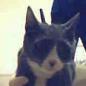

In [3]:
#CHECK FULL FILE PATH!
with Image.open('C:/Users/A221LPEN/Desktop/Pytorch_for_Deep_Learning/PYTORCH_NOTEBOOKS/myCodes/Data/CATS_DOGS/test/CAT/10107.jpg') as im:
    display(im)

In [16]:
#Create list of image file names
path = "C:/Users/A221LPEN/Desktop/Pytorch_for_Deep_Learning/PYTORCH_NOTEBOOKS/myCodes/Data/CATS_DOGS"
img_names = []

#use os walk fn to walk through the sub dir of test & train, & grab all image filenames
for folder,subfolders,filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)


In [15]:
len(img_names)

24994

In [9]:
#chck img
img_sizes = []
rejected = []

#try to open the image & get image size
for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
            
    #if not image reject--too smal or something/not even an image       
    except:
        rejected.append(item)

In [10]:
print(len(img_sizes))
print(len(rejected))

24994
0


In [11]:
#Create Dataframe
df = pd.DataFrame(img_sizes)

In [12]:
df.head()

,0,1
0,431,360
1,500,375
2,500,471
3,500,375
4,320,240


In [13]:
df[0].describe() #width

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: 0, dtype: float64

In [14]:
df[1].describe() #height

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: 1, dtype: float64

In [ ]:
#PART 2 

In [17]:
dog = Image.open('C:/Users/A221LPEN/Desktop/Pytorch_for_Deep_Learning/PYTORCH_NOTEBOOKS/myCodes/Data/CATS_DOGS/train/DOG/14.jpg')

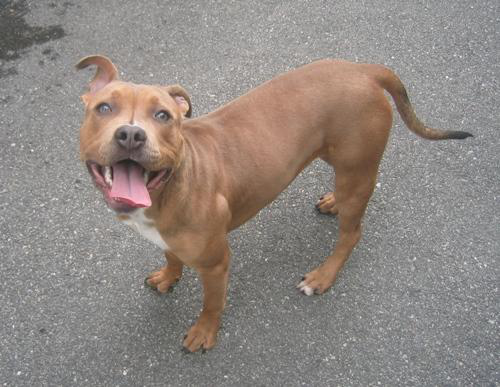

In [18]:
display(dog)

In [19]:
dog.size

(500, 387)

In [20]:
dog.getpixel((0,0)) #0 ---> 255

(90, 95, 98)

In [21]:
#transform jpg to tensor
transform = transforms.Compose([
    transforms.ToTensor()
])

im = transform(dog)
print(type(im))
print(im.shape)

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


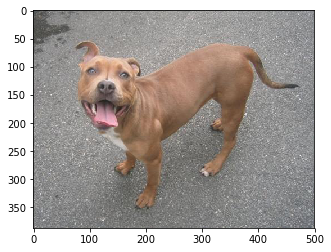

In [22]:
#plot that imshow want is (387,500,3)
#transpose/reshape using numpy image to (1,2,0)...index 0=3,index 1=387, index 2=500
plt.imshow(np.transpose(im.numpy(),(1,2,0)))


In [23]:
im[:,0,0]

tensor([0.3529, 0.3725, 0.3843])

In [24]:
np.array((90,95,98)) /255

array([0.35294118, 0.37254902, 0.38431373])

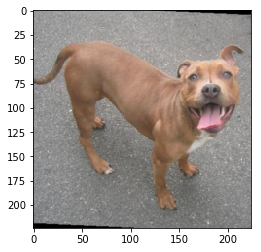

In [33]:
transform = transforms.Compose([
    #random rotate/flip/transform using probability,1=100%,usually p=0.5
    transforms.RandomHorizontalFlip(p=1),
    
    #rotate randomly +-30degree
    transforms.RandomRotation(30),
    
    #resize--larger or smaller
    transforms.Resize(224),
    
    #centerCrop--crop to get thing to same size (for centered image)
    transforms.CenterCrop(224),
    
    #these transformations are meant to create a larger/robust dataset
    
    transforms.ToTensor()
])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [34]:
#oftenly, when we are working with other networks maybe pre-trained network, 
#they actually trained on specifically normalizes images that ranged maybe 0.5 to -0.5
#we write the data above as torch tensor and the pixel got normalized to be 0 and 1
#so we have specific standardization or normalization 

#but if we want to use someone's pre-trained network that work on different set of normalized values
#we're going to take our images and normalize them in the exact same way that the pretrained network was normalized

#this is the reason why we are doing a very specific normalization


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


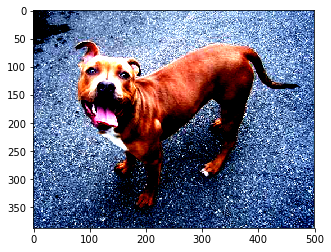

In [35]:
transform = transforms.Compose([
    transforms.ToTensor(),
    #we already know that when we load this image, the value will be between 0 and 1
    #but sometimesin pre-trained network, it has very specific mean & std 
    #there's research on mean &std values that are good to be used/practised
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229,0.224,0.224])
    #these values are used by most pre-trained network
    
])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))


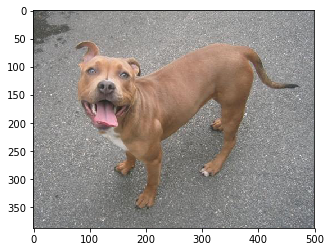

In [37]:
#inverse the normalization or denormalize
inv_normalize = transforms.Normalize(
    #grab mean & divide by std and take the reciprocal of std
    mean = [-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std = [1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1,2,0)));
